In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Baixar os dados históricos do BBAS3
bbas3 = yf.Ticker('BBAS3.SA')
historical_data = bbas3.history(period='max')
dividends = bbas3.dividends

# Calcular a média móvel de 90 dias e o desvio padrão
historical_data['MA90'] = historical_data['Close'].rolling(window=90).mean()
historical_data['STD90'] = historical_data['Close'].rolling(window=90).std()

# Inicializar variáveis
initial_cash = 1000
cash = initial_cash
shares = 0
pending_dividends = {}
investment_value = []

# Iterar sobre os dados históricos e aplicar a estratégia
for i in range(len(historical_data)):
    if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
        date = historical_data.index[i]
        price = historical_data['Close'][i]
        
        # Comprar ações inicialmente
        if shares == 0 and cash > 0:
            shares = cash / price
            cash = 0
            #print(f'Comprou {shares:.4f} ações a {price:.2f} em {date}')
        
        # Verificar se há dividendos a serem recebidos
        if date in dividends.index:
            dividend_amount = dividends[date] * shares
            pending_dividends[date + timedelta(days=30)] = dividend_amount
            #print(f'Recebeu dividendos de R${dividend_amount:.2f} em {date}, a serem aplicados em {date + timedelta(days=30)}')

        # Reinvestir dividendos após um mês
        if date in pending_dividends:
            cash += pending_dividends.pop(date)
            if cash > 0:
                new_shares = cash / price
                shares += new_shares
                cash = 0
                #print(f'Reinvestiu dividendos e comprou {new_shares:.4f} ações a {price:.2f} em {date}')
        
        # Calcular o valor do investimento
        total_value = shares * price + cash
        investment_value.append(total_value)

# Adicionar o valor do investimento na série de dados
historical_data['Investment Value'] = np.nan
for i in range(len(investment_value)):
    historical_data['Investment Value'].iloc[i] = investment_value[i]

# Plotar o gráfico do BBAS3 e da Média Móvel de 90 Dias
plt.figure(figsize=(14, 7))
plt.plot(historical_data['Close'], label='BBAS3', color='blue')
plt.plot(historical_data['MA90'], label='Média Móvel 90 Dias', linestyle='--', color='orange')
plt.title('BBAS3 com Média Móvel de 90 Dias')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

# Plotar o gráfico do Valor do Investimento ao Longo do Tempo
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Investment Value'], label='Valor do Investimento', color='green')
plt.title('Valor do Investimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (R$)')
plt.legend()
plt.grid(True)
plt.show()

print(f'Valor final do investimento: R${investment_value[-1]:.2f}')


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Função para calcular o valor do investimento baseado em uma média móvel específica
def calculate_investment_value(moving_average_days):
    historical_data = bbas3.history(period='max')
    dividends = bbas3.dividends

    # Calcular a média móvel
    historical_data[f'MA{moving_average_days}'] = historical_data['Close'].rolling(window=moving_average_days).mean()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    pending_dividends = {}
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(historical_data)):
        if i >= moving_average_days:  # Para garantir que temos pelo menos a quantidade de dias da média móvel
            date = historical_data.index[i]
            price = historical_data['Close'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
                print(f'Comprou {shares:.4f} ações a {price:.2f} em {date} com média de {moving_average_days} dias')
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                pending_dividends[date + timedelta(days=30)] = dividend_amount
                print(f'Recebeu dividendos de R${dividend_amount:.2f} em {date}, a serem aplicados em {date + timedelta(days=30)}')

            # Reinvestir dividendos após um mês
            if date in pending_dividends:
                cash += pending_dividends.pop(date)
                if cash > 0:
                    new_shares = cash / price
                    shares += new_shares
                    cash = 0
                    print(f'Reinvestiu dividendos e comprou {new_shares:.4f} ações a {price:.2f} em {date}')
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    historical_data[f'Investment Value {moving_average_days}'] = np.nan
    for i in range(len(investment_value)):
        historical_data[f'Investment Value {moving_average_days}'].iloc[i] = investment_value[i]
    
    return historical_data[f'Investment Value {moving_average_days}']

# Baixar os dados históricos do BBAS3
bbas3 = yf.Ticker('BBAS3.SA')

# Calcular o valor do investimento para diferentes médias móveis
historical_data = bbas3.history(period='max')  # Rebaixar dados históricos para uso posterior
historical_data['MA30'] = historical_data['Close'].rolling(window=30).mean()
historical_data['MA60'] = historical_data['Close'].rolling(window=60).mean()
historical_data['MA90'] = historical_data['Close'].rolling(window=90).mean()
historical_data['MA120'] = historical_data['Close'].rolling(window=120).mean()

# Calcular valores do investimento para cada média móvel
investment_value_30 = calculate_investment_value(30)
investment_value_60 = calculate_investment_value(60)
investment_value_90 = calculate_investment_value(90)
investment_value_120 = calculate_investment_value(120)

# Plotar o gráfico do BBAS3 e das Médias Móveis de 30, 60, 90 e 120 Dias
plt.figure(figsize=(14, 7))
plt.plot(historical_data['Close'], label='BBAS3', color='blue')
plt.plot(historical_data['MA30'], label='Média Móvel 30 Dias', linestyle='--', color='orange')
plt.plot(historical_data['MA60'], label='Média Móvel 60 Dias', linestyle='--', color='purple')
plt.plot(historical_data['MA90'], label='Média Móvel 90 Dias', linestyle='--', color='green')
plt.plot(historical_data['MA120'], label='Média Móvel 120 Dias', linestyle='--', color='red')
plt.title('BBAS3 com Médias Móveis de 30, 60, 90 e 120 Dias')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

# Plotar o gráfico do Valor do Investimento ao Longo do Tempo
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, investment_value_30, label='Valor com MA 30 Dias', color='orange')
plt.plot(historical_data.index, investment_value_60, label='Valor com MA 60 Dias', color='purple')
plt.plot(historical_data.index, investment_value_90, label='Valor com MA 90 Dias', color='green')
plt.plot(historical_data.index, investment_value_120, label='Valor com MA 120 Dias', color='red')
plt.title('Valor do Investimento ao Longo do Tempo para Diferentes Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (R$)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Função para calcular o valor do investimento baseado em uma média móvel de 90 dias
def calculate_investment_value(ticker):
    #data = yf.Ticker(ticker).history(period='max')
    data = yf.Ticker(ticker).history(start='2008-01-01')
    dividends = yf.Ticker(ticker).dividends

    # Calcular a média móvel de 90 dias
    data['MA90'] = data['Close'].rolling(window=90).mean()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    pending_dividends = {}
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(data)):
        if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
            date = data.index[i]
            price = data['Close'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
                #print(f'Comprou {shares:.4f} ações de {ticker} a {price:.2f} em {date}')
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                pending_dividends[date + timedelta(days=30)] = dividend_amount
                #print(f'Recebeu dividendos de R${dividend_amount:.2f} de {ticker} em {date}, a serem aplicados em {date + timedelta(days=30)}')

            # Reinvestir dividendos após um mês
            if date in pending_dividends:
                cash += pending_dividends.pop(date)
                if cash > 0:
                    new_shares = cash / price
                    shares += new_shares
                    cash = 0
                    #print(f'Reinvestiu dividendos e comprou {new_shares:.4f} ações de {ticker} a {price:.2f} em {date}')
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    data['Investment Value'] = np.nan
    for i in range(len(investment_value)):
        data['Investment Value'].iloc[i] = investment_value[i]
    
    return data.index, data['Investment Value']

# Lista de tickers
tickers = ['GOAU4.SA','BBAS3.SA', 'KLBN4.SA', 'BRSR6.SA', 'BBDC4.SA', 'ROMI3.SA', 'CMIG4.SA','ITSA4.SA','CPLE6.SA','SAPR4.SA']

# testados_estranho=['GOAU4.SA']

# Plotar o valor do investimento ao longo do tempo para cada ticker
plt.figure(figsize=(14, 10))

for ticker in tickers:
    dates, investment_value = calculate_investment_value(ticker)
    plt.plot(dates, investment_value, label=ticker)

# Configurações do gráfico
plt.title('Valor do Investimento ao Longo do Tempo com Média Móvel de 90 Dias')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (R$)')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('GLOBAL2.png')


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Função para calcular o valor do investimento baseado em uma média móvel de 90 dias
def calculate_investment_value(ticker):
    #data = yf.Ticker(ticker).history(period='max')
    data = yf.Ticker(ticker).history(start='2008-01-01')
    dividends = yf.Ticker(ticker).dividends

    # Calcular a média móvel de 90 dias
    data['MA90'] = data['Close'].rolling(window=90).mean()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    pending_dividends = {}
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(data)):
        if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
            date = data.index[i]
            price = data['Close'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
                #print(f'Comprou {shares:.4f} ações de {ticker} a {price:.2f} em {date}')
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                pending_dividends[date + timedelta(days=30)] = dividend_amount
                #print(f'Recebeu dividendos de R${dividend_amount:.2f} de {ticker} em {date}, a serem aplicados em {date + timedelta(days=30)}')

            # Reinvestir dividendos após um mês
            if date in pending_dividends:
                cash += pending_dividends.pop(date)
                if cash > 0:
                    new_shares = cash / price
                    shares += new_shares
                    cash = 0
                    #print(f'Reinvestiu dividendos e comprou {new_shares:.4f} ações de {ticker} a {price:.2f} em {date}')
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    data['Investment Value'] = np.nan
    for i in range(len(investment_value)):
        data['Investment Value'].iloc[i] = investment_value[i]
    
    return data.index, data['Investment Value']

# Lista de tickers
#tickers = ['VIVT3.SA']

tickers = ['GOAU4.SA','BBAS3.SA', 'KLBN4.SA', 'BBDC4.SA', 'CMIG4.SA','PETR4.SA','VALE3.SA','ABEV3.SA','VIVT3.SA']

# Plotar o valor do investimento ao longo do tempo para cada ticker
plt.figure(figsize=(14, 10))

for ticker in tickers:
    dates, investment_value = calculate_investment_value(ticker)
    plt.plot(dates, investment_value, label=ticker)

# Configurações do gráfico
plt.title('Valor do Investimento ao Longo do Tempo com Média Móvel de 90 Dias')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (R$)')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('GLOBAL.png')


In [ ]:
#comprando com dividendos depois de uma queda de 2 sigmas

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Função para calcular o valor do investimento com reinvestimento imediato dos dividendos
def calculate_investment_value_immediate(ticker):
    data = yf.Ticker(ticker).history(period='max')
    dividends = yf.Ticker(ticker).dividends

    # Calcular a média móvel de 90 dias e o desvio padrão
    data['MA90'] = data['Close'].rolling(window=90).mean()
    data['StdDev'] = data['Close'].rolling(window=90).std()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(data)):
        if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
            date = data.index[i]
            price = data['Close'][i]
            ma90 = data['MA90'][i]
            stddev = data['StdDev'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                cash += dividend_amount
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    data['Investment Value Immediate'] = np.nan
    data['Investment Value Immediate'].iloc[90:] = investment_value
    
    return data.index, data['Investment Value Immediate']

# Função para calcular o valor do investimento com reinvestimento condicional dos dividendos
def calculate_investment_value_conditional(ticker):
    data = yf.Ticker(ticker).history(period='max')
    dividends = yf.Ticker(ticker).dividends

    # Calcular a média móvel de 90 dias e o desvio padrão
    data['MA90'] = data['Close'].rolling(window=90).mean()
    data['StdDev'] = data['Close'].rolling(window=90).std()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    pending_dividends = 0
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(data)):
        if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
            date = data.index[i]
            price = data['Close'][i]
            ma90 = data['MA90'][i]
            stddev = data['StdDev'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                pending_dividends += dividend_amount
            
            # Reinvestir dividendos se a condição for atendida
            if (price - ma90) > 2 * stddev:
                cash += pending_dividends
                pending_dividends = 0
                if cash > 0:
                    new_shares = cash / price
                    shares += new_shares
                    cash = 0
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    data['Investment Value Conditional'] = np.nan
    data['Investment Value Conditional'].iloc[90:] = investment_value
    
    return data.index, data['Investment Value Conditional']

# Calcular valores de investimento para os dois casos
ticker = 'BBAS3.SA'
dates_immediate, investment_value_immediate = calculate_investment_value_immediate(ticker)
dates_conditional, investment_value_conditional = calculate_investment_value_conditional(ticker)

# Plotar os valores de investimento
plt.figure(figsize=(14, 7))

plt.plot(dates_immediate, investment_value_immediate, label='Reinvestimento Imediato')
plt.plot(dates_conditional, investment_value_conditional, label='Reinvestimento Condicional')

# Configurações do gráfico
plt.title('Valor do Investimento ao Longo do Tempo (BBAS3)')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (R$)')
plt.legend()
plt.grid(True)
plt.show()


/home/zavanin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


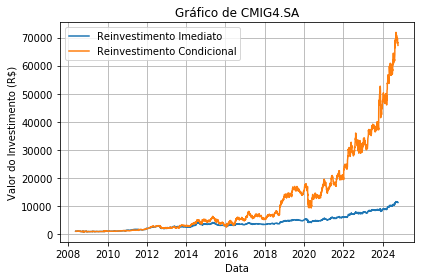

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Função para calcular o valor do investimento com reinvestimento imediato dos dividendos
def calculate_investment_value_immediate(ticker):
    data = yf.Ticker(ticker).history(start='2008-01-01')
    dividends = yf.Ticker(ticker).dividends

    # Calcular a média móvel de 90 dias e o desvio padrão
    data['MA90'] = data['Close'].rolling(window=90).mean()
    data['StdDev'] = data['Close'].rolling(window=90).std()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(data)):
        if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
            date = data.index[i]
            price = data['Close'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                cash += dividend_amount
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    data['Investment Value Immediate'] = np.nan
    data['Investment Value Immediate'].iloc[90:] = investment_value
    
    return data.index, data['Investment Value Immediate']

# Função para calcular o valor do investimento com reinvestimento condicional dos dividendos
def calculate_investment_value_conditional(ticker):
    data = yf.Ticker(ticker).history(start='2008-01-01')
    dividends = yf.Ticker(ticker).dividends

    # Calcular a média móvel de 90 dias e o desvio padrão
    data['MA90'] = data['Close'].rolling(window=90).mean()
    data['StdDev'] = data['Close'].rolling(window=90).std()

    # Inicializar variáveis
    initial_cash = 1000
    cash = initial_cash
    shares = 0
    pending_dividends = 0
    investment_value = []

    # Iterar sobre os dados históricos e aplicar a estratégia
    for i in range(len(data)):
        if i >= 90:  # Para garantir que temos pelo menos 90 dias de dados
            date = data.index[i]
            price = data['Close'][i]
            ma90 = data['MA90'][i]
            stddev = data['StdDev'][i]
            
            # Comprar ações inicialmente
            if shares == 0 and cash > 0:
                shares = cash / price
                cash = 0
            
            # Verificar se há dividendos a serem recebidos
            if date in dividends.index:
                dividend_amount = dividends[date] * shares
                pending_dividends += dividend_amount
            
            # Reinvestir dividendos se a condição for atendida
            if (price - ma90) < -2 * stddev:
                cash += pending_dividends
                pending_dividends = 0
                if cash > 0:
                    new_shares = cash / price
                    shares += new_shares
                    cash = 0
            
            # Calcular o valor do investimento
            total_value = shares * price + cash
            investment_value.append(total_value)
    
    # Adicionar o valor do investimento na série de dados
    data['Investment Value Conditional'] = np.nan
    data['Investment Value Conditional'].iloc[90:] = investment_value
    
    return data.index, data['Investment Value Conditional']

# Lista de tickers
tickers = ['CMIG4.SA']

# tickers = ['BBAS3.SA', 'GOAU4.SA', 'KLBN4.SA', 'BRSR6.SA', 'COGN3.SA', 'BBDC4.SA', 'ROMI3.SA', 'CMIG4.SA','VALE3.SA','PETR4.SA','MGLU3.SA']


# Plotar os valores de investimento para cada ticker em gráficos separados
for ticker in tickers:
    dates_immediate, investment_value_immediate = calculate_investment_value_immediate(ticker)
    dates_conditional, investment_value_conditional = calculate_investment_value_conditional(ticker)
    
#     plt.figure(figsize=(14, 7))
    plt.plot(dates_immediate, investment_value_immediate, label='Reinvestimento Imediato')
    plt.plot(dates_conditional, investment_value_conditional, label='Reinvestimento Condicional')
    
    # Configurações do gráfico
#     plt.title(f'Valor do Investimento ao Longo do Tempo ({ticker})')
    plt.xlabel('Data')
    plt.ylabel('Valor do Investimento (R$)')
    plt.title("Gráfico de "+ticker)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(ticker+'_condicional.png')
    plt.show()


In [6]:
investment_value_immediate.max()

11546.137475391144

In [5]:
investment_value_conditional.max()

71856.97481664098